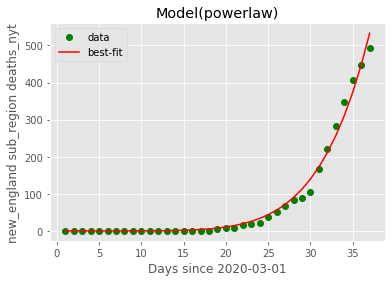

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import models
import pickle
sys.path.insert(0, os.path.abspath('../lib'))
import c19all

df = pickle.load(open( '../output/pickles/df_us_combined.p', 'rb')).reset_index()

''' Define the analytic dataset
    count_of:   required, `cases_nyt`, `cases_jnu`, `deaths_nyt`, `deaths_jhu`, `recovered` (JHU), `active` (JHU)
    start_date: required, >= 2020-01-02
    location:   optional, comment out the declaration for national level data. Options are:
        `region`, `sub_region`, `state`, `county`. For county, value is ['county_name', 'state_name']
'''
count_of = 'deaths_nyt'
start_date = pd.to_datetime('2020-03-01')
location = {
    'type': 'county',
    'value': ['Livingston', 'New York']
}

if 'location' in locals():
    if location['type'] == 'county':
        county = location['value'][0]
        state = location['value'][1]
        df = df[df.county == county]
        df = df[df.state == state]
        ylabel = f'{county} county, {state} {count_of}'
    else:
        df = df[df[location['type']] == location['value']]
        ylabel = f'{location["value"]} {location["type"]} {count_of}'
else:
    ylabel = f'US { count_of}'
df = df[df.date >= start_date]
df.day = df.day.apply(lambda day: (day - (c19all.date_to_day(start_date ) - 1)))
df = df.groupby('day').sum().reset_index()

# See https://lmfit.github.io/lmfit-py/builtin_models.html for model options
model = models.PowerLawModel()
params = model.make_params()
result = model.fit(df[count_of], params, x=df.day.to_list())
plt.style.use('ggplot')
xlabel = f'Days since {start_date.strftime("%Y-%m-%d")}'
result.plot_fit(xlabel=xlabel, ylabel=ylabel, datafmt='og', fitfmt='r')